In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
print(f"当前工作路径: {os.getcwd()}")
print(os.listdir())  # 列出当前目录下的所有文件和文件夹
os.chdir("/content/drive/My Drive/wisig-examples")  # 替换成你的仓库名称
print(f"切换后的工作目录: {os.getcwd()}")

当前工作路径: /content
['.config', 'drive', 'sample_data']
切换后的工作目录: /content/drive/My Drive/wisig-examples


In [3]:
%load_ext autoreload

%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [4]:
GPU = ""
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]=GPU

In [5]:
with open('data_summary.pkl', 'rb') as f:
    d=pickle.load(f)
capture_date_list=d['capture_date_list']
tx_list= d['tx_list']
rx_list= d['rx_list']
mat_date=np.array(d['mat_date'])
mat_date_eq=np.array(d['mat_date_eq'])

In [11]:
print(d['mat_date'])

[array([[  0., 651., 386., ..., 189., 251., 262.],
       [999., 670., 383., ..., 195., 256., 266.],
       [991., 649., 379., ..., 185., 255., 260.],
       ...,
       [391., 318., 272., ...,  15., 141., 140.],
       [392., 323., 290., ...,  66., 144.,   0.],
       [980., 673., 381., ..., 193., 258.,   0.]]), array([[   0., 1012., 1178., ...,  192.,  268.,  276.],
       [   0., 1026., 1172., ...,  192.,  268.,  275.],
       [  13., 1045., 1176., ...,  192.,  269.,  275.],
       ...,
       [  46.,  471.,  547., ...,   32.,  121.,  126.],
       [  80.,  496.,  545., ...,   95.,  123.,    0.],
       [  14., 1026., 1168., ...,  190.,  268.,    0.]]), array([[1126.,  954.,   12., ...,  197.,  275.,  270.],
       [1127.,  956.,   22., ...,  197.,  275.,  272.],
       [1132.,  958.,   11., ...,  196.,  275.,  270.],
       ...,
       [ 554.,  464.,   28., ...,   17.,  134.,  144.],
       [ 568.,  496.,   77., ...,   93.,  127.,    0.],
       [1128.,  964.,   16., ...,  198.,  2

In [8]:
from matplotlib.colors import LogNorm
def plot_mat(mat, title):


    im = plt.matshow(np.maximum(mat,1e-10),origin='lower',norm=LogNorm(vmin=1, vmax=2000))
    plt.title(title)
    fig=plt.gcf()
    plt.gca().xaxis.set_ticks_position('bottom')
    t = [1, 10, 50, 250,2000]
    fig.colorbar(im,  ticks=t, format='$%.0f$')
    # plt.colorbar()
    plt.xlabel('Tx identifier')
    plt.ylabel('Rx identifier')


# Plot Tx-Rx grid for all days (non-equalized)

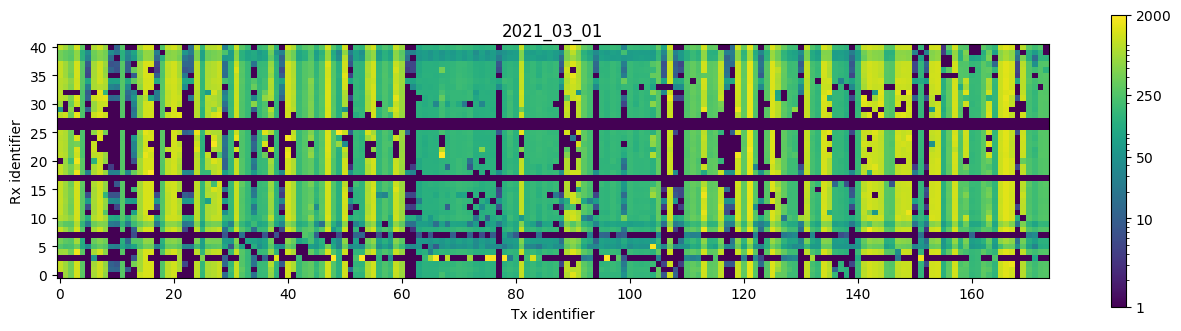

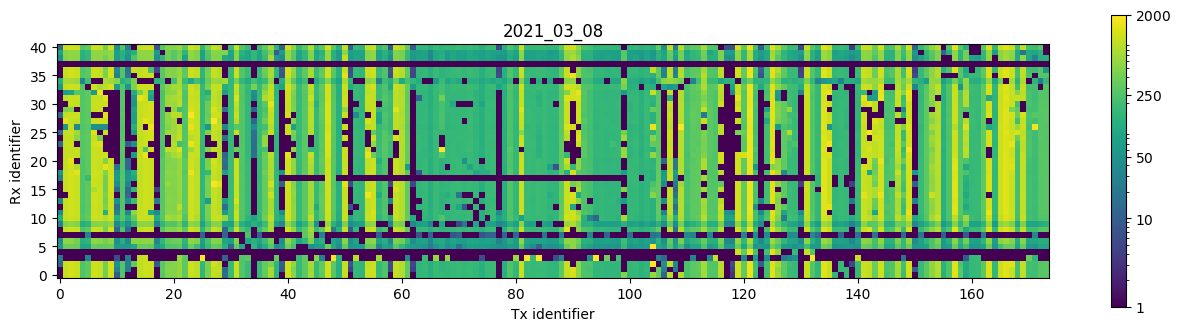

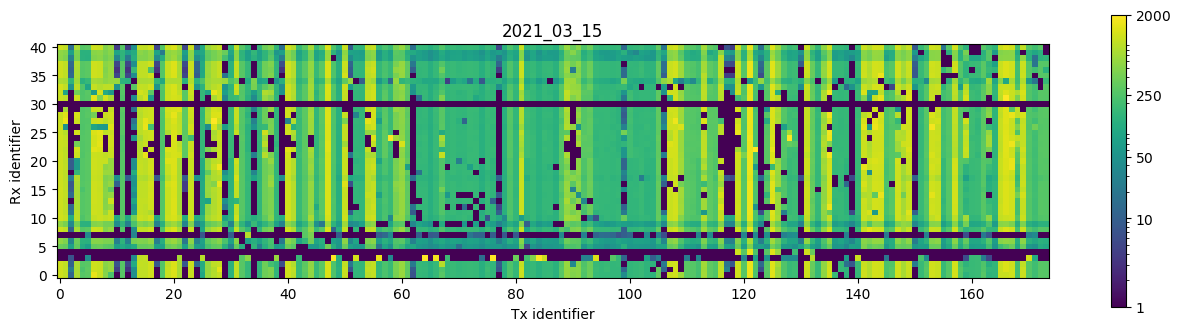

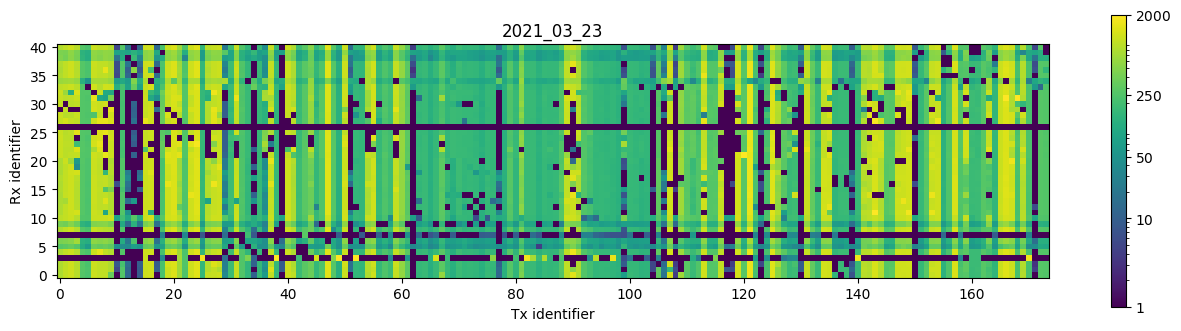

In [9]:
for mat,capture_date in zip(mat_date,capture_date_list):
    plot_mat(mat,capture_date)


# Plot Tx-Rx grid for all days (equalized)

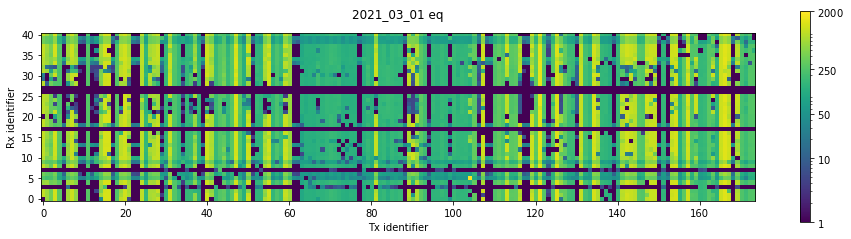

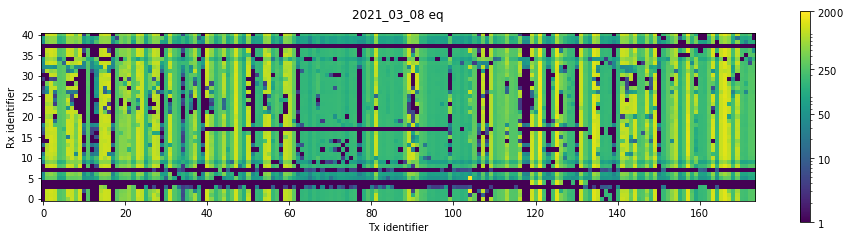

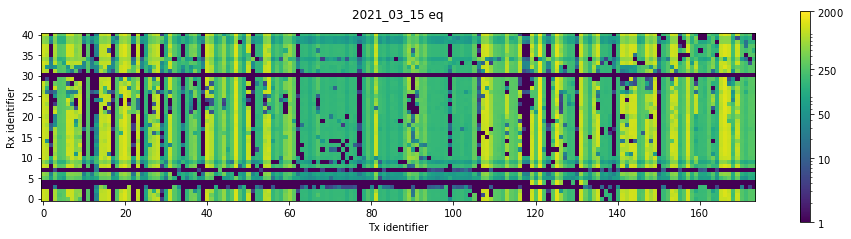

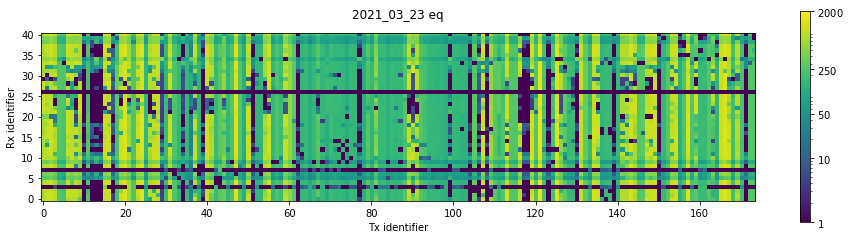

In [ ]:
for mat,capture_date in zip(mat_date_eq,capture_date_list):
    plot_mat(mat,capture_date+' eq')


# View hardware specs

In [10]:
import pickle
with open('orbit_hardware.pkl', 'rb') as f:
    [tx_hardware,rx_hardware]=pickle.load(f)
print(tx_hardware['1-1'])
print(rx_hardware['2-1'])

Atheros_AR5212_AR5213
N210
